In [1]:
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('C:/Users/lenovo/python_code/london_merged1.csv')
dataset.head(22)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,t3,t4,hum1,wind_speed1,weather_code1,is_holiday1,is_weekend1,season1
0,2015/1/4 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3,12.0,12.0,67.0,35.0,2.0,0.0,0.0,3.0
1,2015/1/4 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3,13.0,13.0,63.0,34.0,2.0,0.0,1.0,3.0
2,2015/1/4 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3,12.0,12.0,67.0,36.0,2.0,0.0,1.0,3.0
3,2015/1/4 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3,12.0,12.0,69.5,38.0,1.0,0.0,1.0,3.0
4,2015/1/4 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3,12.0,12.0,69.5,35.0,1.0,0.0,1.0,3.0
5,2015/1/4 5:00,46,2.0,2.0,93.0,4.0,1,0,1,3,12.0,12.0,69.5,35.0,1.0,0.0,1.0,3.0
6,2015/1/4 6:00,51,1.0,-1.0,100.0,7.0,4,0,1,3,12.0,12.0,72.0,31.5,2.0,0.0,1.0,3.0
7,2015/1/4 7:00,75,1.0,-1.0,100.0,7.0,4,0,1,3,12.0,12.0,72.0,30.5,1.0,0.0,1.0,3.0
8,2015/1/4 8:00,131,1.5,-1.0,96.5,8.0,4,0,1,3,12.0,12.0,67.0,34.0,2.0,0.0,1.0,3.0
9,2015/1/4 9:00,301,2.0,-0.5,100.0,9.0,3,0,1,3,12.0,12.0,67.0,34.5,2.0,0.0,1.0,3.0


In [4]:
dataset = dataset.iloc[:500,1:18]
dataset.head(20)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,t3,t4,hum1,wind_speed1,weather_code1,is_holiday1,is_weekend1,season1
0,182,3.0,2.0,93.0,6.0,3,0,1,3,12.0,12.0,67.0,35.0,2.0,0.0,0.0,3.0
1,138,3.0,2.5,93.0,5.0,1,0,1,3,13.0,13.0,63.0,34.0,2.0,0.0,1.0,3.0
2,134,2.5,2.5,96.5,0.0,1,0,1,3,12.0,12.0,67.0,36.0,2.0,0.0,1.0,3.0
3,72,2.0,2.0,100.0,0.0,1,0,1,3,12.0,12.0,69.5,38.0,1.0,0.0,1.0,3.0
4,47,2.0,0.0,93.0,6.5,1,0,1,3,12.0,12.0,69.5,35.0,1.0,0.0,1.0,3.0
5,46,2.0,2.0,93.0,4.0,1,0,1,3,12.0,12.0,69.5,35.0,1.0,0.0,1.0,3.0
6,51,1.0,-1.0,100.0,7.0,4,0,1,3,12.0,12.0,72.0,31.5,2.0,0.0,1.0,3.0
7,75,1.0,-1.0,100.0,7.0,4,0,1,3,12.0,12.0,72.0,30.5,1.0,0.0,1.0,3.0
8,131,1.5,-1.0,96.5,8.0,4,0,1,3,12.0,12.0,67.0,34.0,2.0,0.0,1.0,3.0
9,301,2.0,-0.5,100.0,9.0,3,0,1,3,12.0,12.0,67.0,34.5,2.0,0.0,1.0,3.0


In [5]:
x = dataset.iloc[:,1:17]
x.head(10)

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,t3,t4,hum1,wind_speed1,weather_code1,is_holiday1,is_weekend1,season1
0,3.0,2.0,93.0,6.0,3,0,1,3,12.0,12.0,67.0,35.0,2.0,0.0,0.0,3.0
1,3.0,2.5,93.0,5.0,1,0,1,3,13.0,13.0,63.0,34.0,2.0,0.0,1.0,3.0
2,2.5,2.5,96.5,0.0,1,0,1,3,12.0,12.0,67.0,36.0,2.0,0.0,1.0,3.0
3,2.0,2.0,100.0,0.0,1,0,1,3,12.0,12.0,69.5,38.0,1.0,0.0,1.0,3.0
4,2.0,0.0,93.0,6.5,1,0,1,3,12.0,12.0,69.5,35.0,1.0,0.0,1.0,3.0
5,2.0,2.0,93.0,4.0,1,0,1,3,12.0,12.0,69.5,35.0,1.0,0.0,1.0,3.0
6,1.0,-1.0,100.0,7.0,4,0,1,3,12.0,12.0,72.0,31.5,2.0,0.0,1.0,3.0
7,1.0,-1.0,100.0,7.0,4,0,1,3,12.0,12.0,72.0,30.5,1.0,0.0,1.0,3.0
8,1.5,-1.0,96.5,8.0,4,0,1,3,12.0,12.0,67.0,34.0,2.0,0.0,1.0,3.0
9,2.0,-0.5,100.0,9.0,3,0,1,3,12.0,12.0,67.0,34.5,2.0,0.0,1.0,3.0


In [6]:
y = dataset['cnt']
y.head(10)

0    182
1    138
2    134
3     72
4     47
5     46
6     51
7     75
8    131
9    301
Name: cnt, dtype: int64

In [7]:
print(x.shape)
print(y.shape)

(500, 16)
(500,)


In [8]:
#随机挑选
train_x_disorder, test_x_disorder, train_y_disorder, test_y_disorder = train_test_split(x, y,test_size=0.2, random_state=33)

In [9]:
#数据标准化
ss_x = preprocessing.StandardScaler()
train_x_disorder = ss_x.fit_transform(train_x_disorder)
test_x_disorder = ss_x.transform(test_x_disorder)

In [10]:
#变厚矩阵
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

In [11]:
#偏置
def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

In [12]:
#卷积处理，变厚过程
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides = [1,1,1,1],padding = 'SAME')

In [13]:
#pool长宽缩小一倍
def max_pool_2X2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides = [1,2,2,1],padding = 'SAME')

In [14]:
#define placeholder for inputs to network
xs = tf.placeholder(tf.float32,[None,16])
ys = tf.placeholder(tf.float32,[None,1])

In [15]:
keep_prob = tf.placeholder(tf.float32)

In [16]:
x_image = tf.reshape(xs,[-1,4,4,1])#原始数据16变成二维图片2*4

In [17]:
#conv1 layer 第一层卷积
W_conv1 = weight_variable([2,2,1,32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1)+b_conv1)

In [18]:
#conv2 layer第二层卷积层
W_conv2 = weight_variable([2,2,32,64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_conv1,W_conv2)+b_conv2)

In [19]:
#full connection全连接层
#pull a 3D image with 4*4*64 into an one dimensional array of length 512
W_fc1 = weight_variable([4*4*64,512])
b_fc1 = bias_variable([512])

In [20]:
h_pool2_flat = tf.reshape(h_conv2,[-1,4*4*64]) #Dimensional Reduction
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1)+b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob) #drop keep_prob element

In [21]:
#fc2 layer ##full connection
W_fc2 = weight_variable([512,1])
b_fc2 = bias_variable([1])

In [22]:
#calculation results
prediction = tf.matmul(h_fc1_drop,W_fc2)+b_fc2
cross_entropy = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices = [1]))
#learning rate
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)

In [23]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [24]:
train_x_disorder = train_x_disorder.reshape([-1,1])
train_y_disorder = train_y_disorder.reshape([-1,1])

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [25]:
train_x_disorder = np.reshape(train_x_disorder,(-1,16))

In [26]:
for i in range(100):
    sess.run(train_step,feed_dict = {xs:train_x_disorder,ys:train_y_disorder,keep_prob:0.7})
    print(i,"loss =",sess.run(cross_entropy,feed_dict = {xs:train_x_disorder,ys:train_y_disorder,keep_prob:1.0}))

0 loss = 1311937.0
1 loss = 1230269.8
2 loss = 1081432.8
3 loss = 875955.06
4 loss = 701010.75
5 loss = 802259.8
6 loss = 851222.9
7 loss = 743929.25
8 loss = 678663.4
9 loss = 685676.3
10 loss = 717731.06
11 loss = 740114.9
12 loss = 741860.5
13 loss = 724757.4
14 loss = 697022.56
15 loss = 672077.7
16 loss = 664346.9
17 loss = 678316.6
18 loss = 696651.4
19 loss = 695273.75
20 loss = 676807.1
21 loss = 661392.4
22 loss = 659220.75
23 loss = 666197.2
24 loss = 673334.75
25 loss = 674903.6
26 loss = 669502.06
27 loss = 660412.6
28 loss = 652819.8
29 loss = 650866.8
30 loss = 654294.06
31 loss = 657985.8
32 loss = 656694.8
33 loss = 651302.3
34 loss = 646894.3
35 loss = 646253.1
36 loss = 648207.6
37 loss = 649694.7
38 loss = 648951.06
39 loss = 645932.5
40 loss = 642522.06
41 loss = 640744.6
42 loss = 641152.7
43 loss = 641967.4
44 loss = 641104.94
45 loss = 638660.3
46 loss = 636295.0
47 loss = 635276.4
48 loss = 635235.9
49 loss = 634952.75
50 loss = 633668.94
51 loss = 631848.75
52 

In [27]:
test_x_disorder = test_x_disorder.reshape([-1,1])
test_y_disorder = test_y_disorder.reshape([-1,1])

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [28]:
test_x_disorder = np.reshape(test_x_disorder,(-1,16))

In [29]:
#visualization
prediction_value = sess.run(prediction,feed_dict = {xs:test_x_disorder,ys:test_y_disorder,keep_prob:1.0})

In [30]:
import matplotlib.pyplot as plt

In [31]:
fig = plt.figure(figsize = (20,3))
axes = fig.add_subplot(1,1,1)

In [32]:
line1, = axes.plot(range(len(prediction_value)),prediction_value,'b--',label = 'CNN',linewidth = 2)

In [33]:
line2, = axes.plot(range(len(test_y_disorder)),test_y_disorder,'g',label = "TRUE")

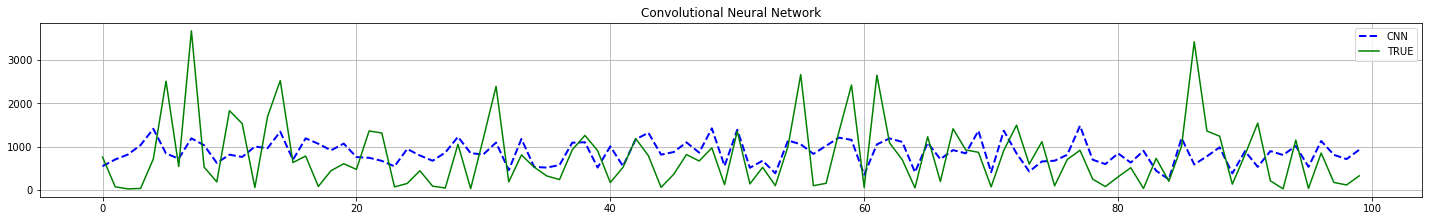

In [34]:
axes.grid()
fig.tight_layout()
plt.legend(handles = [line1,line2])
plt.title("Convolutional Neural Network")
plt.show()